# YOUR PROJECT TITLE

Imports and set magics:

In [50]:
%pip install pandas-datareader
%pip install matplotlib-venn

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2
from scipy.stats.mstats import gmean

import pandas_datareader 
import pydst 

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# user written modules
import dataproject


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

In [51]:
# Loading the Data from statistikbanken
filename1 = 'Kvinder.xlsx'
pd.read_excel(filename1).head(99)

,"Lønniveau efter køn, arbejdssted/bopæl, område og tid",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Enhed: Kr.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
2,Kvinder,Bopælskommune,Hele landet,32609,33771,34253,35041,35514,36034,36718,37216,38071,38871,39715,40818,41606
3,NaN,NaN,København,34298,35418,36044,36808,37357,37912,38713,39232,40318,41327,42359,43664,44490
4,NaN,NaN,Frederiksberg,37771,39130,39900,40342,41225,41802,42625,43515,44581,45812,46888,48234,49120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,NaN,NaN,Jammerbugt,29960,30686,31040,31893,31999,32589,33118,33487,34326,34966,35777,36532,37484
95,NaN,NaN,Læsø,29091,30080,30385,31322,32187,32224,33005,32870,33858,34039,34571,36025,35832
96,NaN,NaN,Mariagerfjord,30277,31534,31575,32277,32585,33063,33591,33885,34493,35293,36080,36948,37784
97,NaN,NaN,Morsø,29683,30692,30854,31402,31341,32205,32445,32809,33748,34106,35095,36178,36767


In [66]:
# Now we are dropping rows
women = pd.read_excel(filename1, skiprows=2)

# Now we drop the first three columns
del women['Unnamed: 0'], women['Unnamed: 1']

# Now we rename the variable 'Unnamed: 2' 
women.rename(columns = {'Unnamed: 2':'City'},inplace=True)
col_dict = {}
for i in range(2009, 2021+1): # range goes from 2009 to 2021
    col_dict[str(i)] = f'women{i}' 
women.rename(columns = col_dict, inplace=True)

# We are only interesetd in the Cities so we drop the whole country
I = women.City.str.contains('NaN')
I |= women.City.str.contains('Hele landet')
women.loc[I, :]
women = women.loc[I == False]

# We reset the index 
women.reset_index(inplace = True, drop = True) # Drop old index too
women.iloc[0:99,:]

# We convert the index from wide to long
#women_long = pd.wide_to_long(women, stubnames='women', i='City', j='year')
#women_long.head(11)








,City,women2009,women2010,women2011,women2012,women2013,women2014,women2015,women2016,women2017,women2018,women2019,women2020,women2021
0,København,34298,35418,36044,36808,37357,37912,38713,39232,40318,41327,42359,43664,44490
1,Frederiksberg,37771,39130,39900,40342,41225,41802,42625,43515,44581,45812,46888,48234,49120
2,Dragør,38251,39025,40591,41402,41644,42429,43785,44102,45306,46464,47955,49266,50210
3,Tårnby,33325,34113,35078,35412,35897,36468,37223,37724,38562,39542,40696,41896,42837
4,Albertslund,32507,33764,34219,35147,35287,35864,36241,36676,37261,37934,38590,39388,40035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Morsø,29683,30692,30854,31402,31341,32205,32445,32809,33748,34106,35095,36178,36767
95,Rebild,31467,32216,32716,33501,33827,34583,35049,35606,36710,37348,38248,39516,40219
96,Thisted,29694,30589,30839,31627,31852,32233,32560,33110,34051,34274,35003,35876,36377
97,Vesthimmerlands,29597,30558,30851,31118,31438,32261,32558,33107,33629,34403,34829,35775,36385


In [69]:
# Loading the Data from statistikbanken
filename2 = 'Mænd.xlsx'
pd.read_excel(filename2).head(99)

,"Lønniveau efter køn, arbejdssted/bopæl, område og tid",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Enhed: Kr.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
2,Mænd,Bopælskommune,Hele landet,38433,39754,40524,41294,41673,42050,42622,43071,43923,44693,45591,46487,47629
3,NaN,NaN,København,38693,40075,40993,41651,42256,42696,43585,44127,45366,46481,47639,48912,49800
4,NaN,NaN,Frederiksberg,44442,46528,47042,48142,48639,49211,50139,50950,52186,53425,54582,55658,56576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,NaN,NaN,Jammerbugt,34772,35808,35946,36695,36742,37387,38241,38685,39388,40117,40963,41653,42733
95,NaN,NaN,Læsø,34139,38258,37985,40077,41007,39969,39101,38300,37824,41182,39280,40123,39011
96,NaN,NaN,Mariagerfjord,34915,36409,36466,37455,37714,38153,38684,39018,39904,40589,41311,41842,42924
97,NaN,NaN,Morsø,32918,34059,33753,34653,34692,34875,35281,35920,36678,37476,38284,39047,40037


In [70]:
# Now we are dropping rows
men = pd.read_excel(filename2, skiprows=2)

# Now we drop the first three columns
del men['Unnamed: 0'], men['Unnamed: 1']

# Now we rename the variable 'Unnamed: 2' 
men.rename(columns = {'Unnamed: 2':'City'},inplace=True)
col_dict = {}
for i in range(2009, 2021+1): # range goes from 2009 to 2021
    col_dict[str(i)] = f'men{i}' 
men.rename(columns = col_dict, inplace=True)

# We are only interesetd in the Cities so we drop the whole country
I = men.City.str.contains('NaN')
I |= men.City.str.contains('Hele landet')
men.loc[I, :]
men = men.loc[I == False]

# We reset the index 
men.reset_index(inplace = True, drop = True) # Drop old index too
men.iloc[0:99,:]

# We convert the index from wide to long
#men_long = pd.wide_to_long(men, stubnames='men', i='City', j='year')
#men_long.head(2)


,City,men2009,men2010,men2011,men2012,men2013,men2014,men2015,men2016,men2017,men2018,men2019,men2020,men2021
0,København,38693,40075,40993,41651,42256,42696,43585,44127,45366,46481,47639,48912,49800
1,Frederiksberg,44442,46528,47042,48142,48639,49211,50139,50950,52186,53425,54582,55658,56576
2,Dragør,48092,50754,52539,53073,53531,53992,55234,57078,57765,59394,60548,61217,62891
3,Tårnby,38744,39304,41037,41151,41752,42069,42543,43254,44417,45676,46628,47539,48878
4,Albertslund,37040,38086,38871,39079,39764,39923,40460,40563,41284,41738,42798,43484,44636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Morsø,32918,34059,33753,34653,34692,34875,35281,35920,36678,37476,38284,39047,40037
95,Rebild,36614,37613,38779,39604,39651,40543,41182,41825,42631,43533,44538,45249,46381
96,Thisted,33257,34015,34466,35383,35900,36113,36352,36766,37379,38059,38514,39292,40469
97,Vesthimmerlands,33276,33693,34258,34263,34489,35222,35989,37012,37306,38258,38653,39768,40550


## Plotting the data

In [56]:
# Data with København Apartments
mand_long_2 = mand.reset_index()
mand_long_2.loc[mand_long_2.City == 'København', :] 
mand_københavn = mand_long_2.loc[mand_long_2['City'] == 'København', :]

# Data with København Houses
kvinde_long_2 = kvinde.reset_index()
kvinde_long_2.loc[kvinde_long_2.City == 'København', :]
kvinde_københavn = kvinde_long_2.loc[kvinde_long_2['City'] == 'København', :]

# Plotting
ax = mand_københavn.plot(x='year', y='løn_mand', label = 'apartment')
kvinde_københavn.plot(x='year', y='house', ax=ax)


#HER SKAL DET OGSÅ TRANSPONERES



KeyError: 'year'

In [ ]:
# defiition of the plot function
def plot_func(df, City):
    # Function that operates on data set
    I = df['City'] == City
    ax=df.loc[I,:].plot(x='year', y='house', style='-o', legend=False)
 # setting the interactive widget
widgets.interact(plot_func, 
    df = widgets.fixed(house_long_2),
    County = widgets.Dropdown(description='County', 
                                    options=house_long_2.County.unique(), 
                                    value='Landsdel Byen København')
);


#HER SKAL DET OGSÅ TRANSPONERES

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

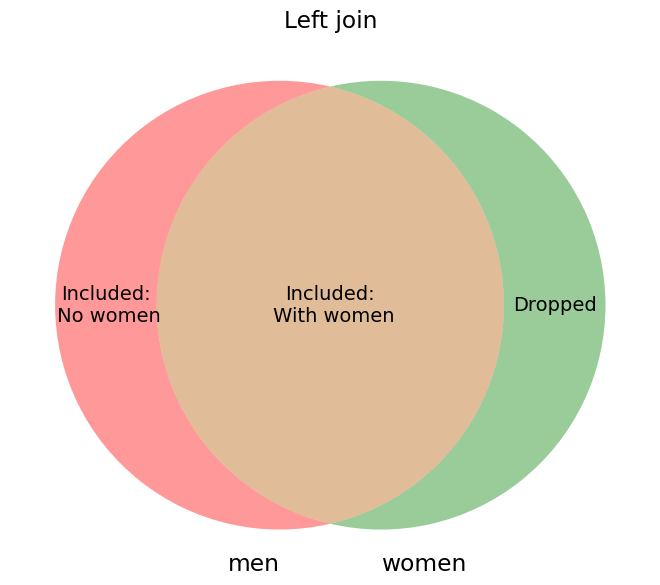

In [64]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('men', 'women'))
v.get_label_by_id('100').set_text('Included:\n No women')
v.get_label_by_id('010').set_text('Dropped' )
v.get_label_by_id('110').set_text('Included:\n With women')
plt.title('Left join')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

In [72]:
# We make a left join merge 
join = pd.merge(women, men, on='City', how='left')
join.head(99)

,City,women2009,women2010,women2011,women2012,women2013,women2014,women2015,women2016,women2017,...,men2012,men2013,men2014,men2015,men2016,men2017,men2018,men2019,men2020,men2021
0,København,34298,35418,36044,36808,37357,37912,38713,39232,40318,...,41651,42256,42696,43585,44127,45366,46481,47639,48912,49800
1,Frederiksberg,37771,39130,39900,40342,41225,41802,42625,43515,44581,...,48142,48639,49211,50139,50950,52186,53425,54582,55658,56576
2,Dragør,38251,39025,40591,41402,41644,42429,43785,44102,45306,...,53073,53531,53992,55234,57078,57765,59394,60548,61217,62891
3,Tårnby,33325,34113,35078,35412,35897,36468,37223,37724,38562,...,41151,41752,42069,42543,43254,44417,45676,46628,47539,48878
4,Albertslund,32507,33764,34219,35147,35287,35864,36241,36676,37261,...,39079,39764,39923,40460,40563,41284,41738,42798,43484,44636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Morsø,29683,30692,30854,31402,31341,32205,32445,32809,33748,...,34653,34692,34875,35281,35920,36678,37476,38284,39047,40037
95,Rebild,31467,32216,32716,33501,33827,34583,35049,35606,36710,...,39604,39651,40543,41182,41825,42631,43533,44538,45249,46381
96,Thisted,29694,30589,30839,31627,31852,32233,32560,33110,34051,...,35383,35900,36113,36352,36766,37379,38059,38514,39292,40469
97,Vesthimmerlands,29597,30558,30851,31118,31438,32261,32558,33107,33629,...,34263,34489,35222,35989,37012,37306,38258,38653,39768,40550


In [75]:
join_long = join.melt(id_vars=['City'], var_name = 'Year', value_name='Salary')
join_long['Gender'] = join_long['Year'].str[:-4]
join_long['Year'] = join_long['Year'].str[-4:]
join_long['City'] = join_long['City'].str.slice(start=9)
join_long.sort_values(['Year', 'City'], ignore_index=True)

,City,Year,Salary,Gender
0,,2009,34298,women
1,,2009,38251,women
2,,2009,33325,women
3,,2009,34963,women
4,,2009,32442,women
...,...,...,...,...
2673,NaN,2021,NaN,women
2674,NaN,2021,NaN,men
2675,NaN,2021,NaN,men
2676,NaN,2021,NaN,men


# Analysis

In [ ]:
# We calculate the growthrate and the geometric mean
house_københavn['Growth_Rate'] = (house_københavn['house'].pct_change(periods=1) * 100)
def g_mean(x):
    a = np.log(x)
    return np.exp(a.mean())
gm1 = g_mean(house_københavn['Growth_Rate'])
print ("%.2f" % gm1)
house_københavn['Gmean'] = gm1
house_københavn['D_Gmean'] = house_københavn.Growth_Rate - house_københavn.Gmean
house_københavn.head(10)

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.